In [2]:
!pip install -Uqq ipdb
import ipdb

In [3]:
%pdb off

Automatic pdb calling has been turned OFF


# Connecting to google drive

In [4]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import os 
datadir = '/content/drive/My Drive/ECE421/Project work /'
os.chdir(datadir)
!pwd

/content/drive/My Drive/ECE421/Project work 


In [6]:
!ls

 Brain_EEG_Mnist_prediction.ipynb   ds35_final_report.gdoc  'trying lstm.ipynb'
 Data				    Emotions_dataset.ipynb


#Importing the Libraries



In [5]:
!pip install ipympl
print('done')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
done


In [7]:
# import the Libraries 
import numpy as np 
import pandas as pd 
import ipympl

# importing important libraries in torch
import torch.nn as nn 
import torch
import torch.utils.data as data_library
from torchsummary import summary


#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

### Enabling the ipympl libraries' dynamic widget thing - it's something that is required in colab

In [8]:

from google.colab import output
output.enable_custom_widget_manager()

#Data description and experiment description
The data was collected from one person for 2 minutes per digit event - 0 to 9. They used a Muse EEG headband which recorded the TP9, TP10 EEG placements via dry electrodes. the stimuli used to evoke the neuronal activity is the showing of MNIST dataset.

Basic precuations have been observed while generating the dataset.

#Acknowledgment of original authors 
I sincerely thank the people who make these data available for everyone. 

http://mindbigdata.com/

https://arxiv.org/ftp/arxiv/papers/2212/2212.14746.pdf


#Citation of the original papers

Vivancos, D., & Cuesta, F. (2022). MindBigData 2022: A Large Dataset of Brain Signals. arXiv preprint arXiv:2212.14746.


#Importing data  

In [9]:
'''
We are going to import data in this cell, the data has been stored in the data/MindBigDataVisualMnist2021-Muse2v0.16Cut2.csv in the same directory.
'''
data = pd.read_csv("Data/MindBigDataVisualMnist2021-Muse2v0.16Cut2.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11387 entries, 0 to 11386
Columns: 1028 entries, dataset to TP10_512
dtypes: float64(1024), int64(3), object(1)
memory usage: 89.3+ MB
None


In [10]:
#taking a look at the small sample of the data 
data.head()

,dataset,origin,digit_event,timestamp,TP9_1,TP9_2,TP9_3,TP9_4,TP9_5,TP9_6,...,TP10_503,TP10_504,TP10_505,TP10_506,TP10_507,TP10_508,TP10_509,TP10_510,TP10_511,TP10_512
0,TRAIN,0,5,1629814705,-24.414062,-23.437500,-32.226562,-28.320312,-21.484375,-30.273438,...,-81.054690,-74.707030,-69.335940,-58.593750,-52.734375,-49.316406,-44.433594,-64.941410,-90.332030,-94.726560
1,TRAIN,1,0,1629814710,-5.859375,-0.976562,-12.695312,-12.695312,-14.160156,-8.300781,...,-144.042970,-151.855470,-140.625000,-133.789060,-130.371100,-117.187500,-112.304690,-123.535160,-112.792970,-89.843750
2,TRAIN,2,4,1629814715,-36.132812,-21.972656,-22.460938,-32.226562,-45.410156,-44.433594,...,-21.484375,-12.207031,-22.460938,-46.386720,-44.433594,-45.410156,-42.480470,-32.226562,-50.292970,-63.964844
3,TRAIN,3,1,1629814720,-11.718750,-28.808594,-32.714844,-14.648438,-20.019531,-29.785156,...,-50.781250,-41.503906,-27.832031,-19.531250,-27.832031,-41.015625,-37.597656,-41.503906,-39.062500,-19.531250
4,TRAIN,4,9,1629814725,-34.667970,-27.343750,-20.996094,-21.972656,-14.648438,-22.949219,...,32.226562,27.343750,20.507812,25.878906,29.296875,44.921875,56.640625,52.734375,45.898438,41.992188


In [10]:
# looking at the mean and the
data.describe()

,origin,digit_event,timestamp,TP9_1,TP9_2,TP9_3,TP9_4,TP9_5,TP9_6,TP9_7,...,TP10_503,TP10_504,TP10_505,TP10_506,TP10_507,TP10_508,TP10_509,TP10_510,TP10_511,TP10_512
count,11387.000000,11387.000000,1.138700e+04,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,...,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000
mean,8206.819707,4.466760,1.634800e+09,-29.457334,-29.078613,-28.745688,-28.806150,-29.155712,-29.363126,-29.171321,...,-28.962449,-28.776433,-28.742472,-28.866354,-29.055843,-29.077198,-28.849373,-28.741143,-28.847358,-28.838825
std,4991.735023,2.889075,3.540655e+06,27.006398,27.000501,26.930567,27.055731,26.973218,27.761129,28.370358,...,19.455219,19.534087,19.661794,19.974545,19.734451,19.874291,20.095713,20.263978,20.357573,20.015783
min,0.000000,0.000000,1.629815e+09,-850.585940,-887.207030,-896.484400,-921.386700,-940.429700,-952.636700,-952.636700,...,-750.000000,-806.640600,-856.933600,-890.625000,-909.667970,-937.988300,-974.609400,-994.628900,-1000.000000,-999.023440
25%,3701.500000,2.000000,1.631086e+09,-42.480470,-41.992188,-41.992188,-41.992188,-41.992188,-41.992188,-42.236329,...,-37.597656,-37.109375,-37.109375,-37.109375,-37.597656,-37.597656,-37.109375,-37.109375,-37.109375,-37.109375
50%,8839.000000,4.000000,1.635488e+09,-29.785156,-29.296875,-28.808594,-28.808594,-29.296875,-29.296875,-29.296875,...,-29.296875,-29.296875,-28.808594,-29.296875,-29.296875,-29.296875,-28.808594,-28.808594,-28.808594,-28.808594
75%,12011.500000,7.000000,1.637563e+09,-16.601562,-16.113281,-15.625000,-15.625000,-16.113281,-16.113281,-16.113281,...,-20.507812,-20.507812,-20.507812,-20.507812,-20.507812,-20.507812,-20.507812,-20.507812,-20.507812,-20.507812
max,16999.000000,9.000000,1.640943e+09,486.816400,499.023440,466.308600,388.671880,355.468750,407.714840,452.636720,...,235.351560,236.816400,243.164060,245.117190,222.656250,215.332030,235.351560,238.281250,235.351560,232.421880


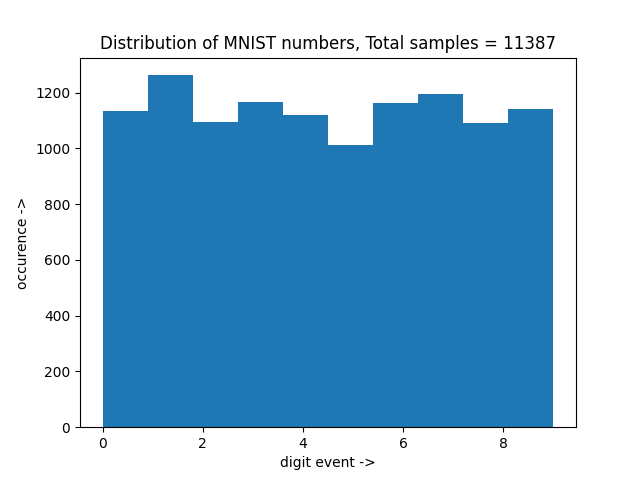

In [19]:
# show the distinct labels of emotions present in the dataset. 
A = pd.value_counts(data['digit_event'])
#print(A)

#print(A.shape)
out_features = A.shape[0]

# make a visualization here. 
plt.figure()
plt.title('Distribution of MNIST numbers, Total samples = {}'.format(len(data)))
plt.hist(x = data['digit_event'].values)
plt.xlabel('digit event ->')
plt.ylabel('occurence ->')
plt.show()

# Visualizations

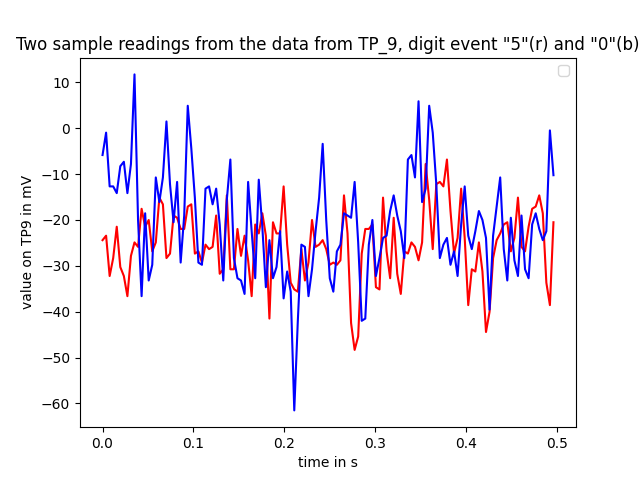

In [14]:
# plot one signal for a specific duration of time 
# we are going to plot a signal from the first row if the data, only for TP_9
length = int(0.5 * 256)
TP_9_data_0 = data.iloc[0, 4:4+length].values
TP_9_data_1 = data.iloc[1, 4:4+length].values
x = np.arange(length) * 1 / 256
fig = plt.figure()
plt.plot(x, TP_9_data_0, 'r', )
plt.plot(x, TP_9_data_1, 'b')
plt.xlabel('time in s')
plt.title('Two sample readings from the data from TP_9, digit event "5"(r) and "0"(b)')
plt.ylabel('value on TP9 in mV')
plt.legend()
plt.show()

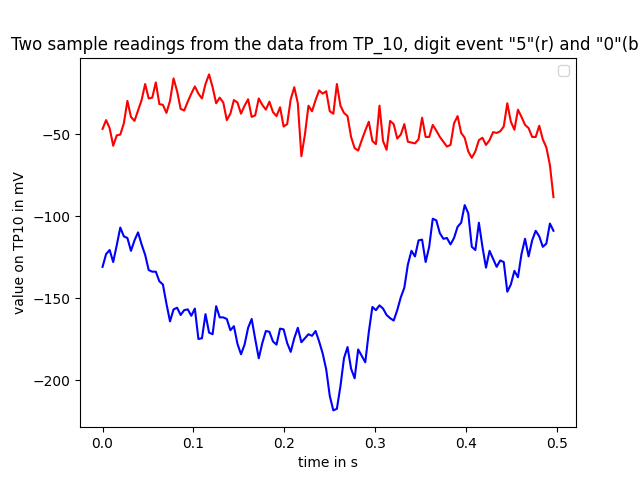

In [15]:
# plot two signal for a specific duration of time 
# we are going to plot a signal from the first and second row if the data, only for TP_10
length = int(0.5 * 256)
TP_10_data_0 = data.iloc[0, 4+512:4+512+length].values
TP_10_data_1 = data.iloc[1, 4+512:4+512+length].values
x = np.arange(length) * 1 / 256
fig = plt.figure()
plt.plot(x, TP_10_data_0, 'r', )
plt.plot(x, TP_10_data_1, 'b')
plt.xlabel('time in s')
plt.title('Two sample readings from the data from TP_10, digit event "5"(r) and "0"(b)')
plt.ylabel('value on TP10 in mV')
plt.legend()
plt.show()

In [16]:
# plot many signals over the same graph over a specific duration of time
# todo 

# Prediction of Brain Waves

## converting to numpy arrays

In [11]:
train_data_y = data.iloc[:, 2]
train_data = data.iloc[:, 4:]
print(train_data.shape)
print(train_data_y.shape)

(11387, 1024)
(11387,)


In [12]:
y_tr = train_data_y.values
x_tr = train_data.values

## train set validation set creation

In [13]:
TEST_SIZE = 0.1


# DO NOT CHANGE
x_tr, x_te, y_tr, y_te = train_test_split(x_tr, y_tr, test_size = TEST_SIZE, shuffle=True)

In [14]:
print(x_tr[0, :10])

[-15.625    -32.226562 -50.78125  -59.08203  -39.0625   -24.414062
 -41.992188 -57.617188 -52.246094 -15.625   ]


In [15]:
# sanity checks performed here. 
print(x_tr.shape)
print(y_tr.shape)

(10248, 1024)
(10248,)


In [16]:
y_tr = y_tr.astype(int)
y_te = y_te.astype(int)

# Training Switches

### you can switch on or off any switch here depending on whether you want to train that model or not. 

In [17]:
test_models_regression = {'decision_tree_classification' : () , 'xgb_classification' : (), 'nn_classification' : (), 'cnn_classification':(), 'lstm_classification':() }


### Training of the model starts here

####Decision Tree

Include 'decision_tree_classification' in the test_models_regression dict to switch on the training







decision tree regression results ::

best Parameteres:  {'max_depth': 6}
train : 2.2555575327784347
test : 2.8638248897140395


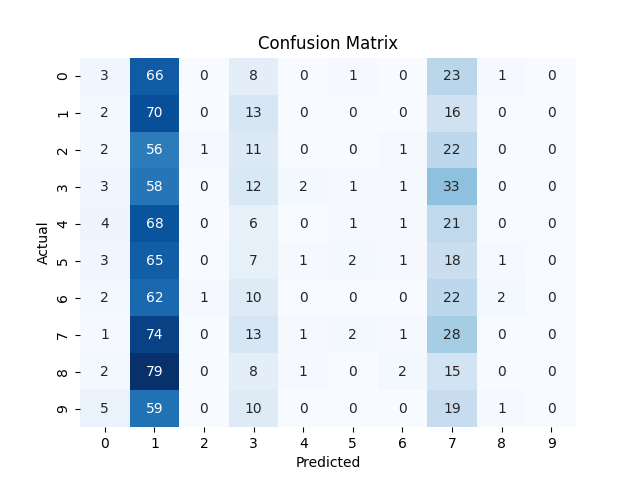

[[ 3 66  0  8  0  1  0 23  1  0]
 [ 2 70  0 13  0  0  0 16  0  0]
 [ 2 56  1 11  0  0  1 22  0  0]
 [ 3 58  0 12  2  1  1 33  0  0]
 [ 4 68  0  6  0  1  1 21  0  0]
 [ 3 65  0  7  1  2  1 18  1  0]
 [ 2 62  1 10  0  0  0 22  2  0]
 [ 1 74  0 13  1  2  1 28  0  0]
 [ 2 79  0  8  1  0  2 15  0  0]
 [ 5 59  0 10  0  0  0 19  1  0]]
              precision    recall  f1-score   support

           0       0.11      0.03      0.05       102
           1       0.11      0.69      0.18       101
           2       0.50      0.01      0.02        93
           3       0.12      0.11      0.12       110
           4       0.00      0.00      0.00       101
           5       0.29      0.02      0.04        98
           6       0.00      0.00      0.00        99
           7       0.13      0.23      0.17       120
           8       0.00      0.00      0.00       107
           9       0.00      0.00      0.00        94

    accuracy                           0.11      1025
   macro avg       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Decision tree training here if the switch of Decision Tree is Set to on. 'decision_tree_classification' to switch on.
  
if "decision_tree_classification" in test_models_regression : 
    from sklearn.tree import DecisionTreeClassifier
    
    SS = StandardScaler()
    x_tr_st = SS.fit_transform(x_tr)
    x_te_st = SS.transform(x_te)
    
    print('\n\n')
    print('\n\n\ndecision tree regression results ::\n')
    tune_param = {
        'max_depth' : (3,4,5,6)
    }
    linr = GridSearchCV( DecisionTreeClassifier(), tune_param )
    linr.fit(x_tr_st, y_tr)
    #print('Best Parameters results :' , clf.cv_results_)
    print('best Parameteres: ' , linr.best_params_)
    
    #linr.fit(x_tr_st, y_tr)
    
    
    y_p_tr = linr.predict_proba(x_tr_st)
    y_p_te = linr.predict_proba(x_te_st)
    
    from sklearn.metrics import log_loss
    print('train :' ,log_loss(y_tr, y_p_tr))
    print('test :' ,log_loss( y_te , y_p_te))
    
    cm = confusion_matrix(y_te , y_p_te.argmax(axis =1) )
    plt.figure()
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print(cm)
    print(classification_report(y_te, y_p_te.argmax(axis =1) ))
    #print('r2_score_test :' ,r2_score(y_te, y_p_te) ,  '\n\n')
    
    test_models_regression['decision_tree_classification'] = (linr , 1,  log_loss(y_te, y_p_te))


XGBoost Training here. Include 'xgb_classification' to switch on. 






 xgb regreassion results ::

best Parameteres:  {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 5}
train : 2.301550105717667
test : 2.3025469843664896


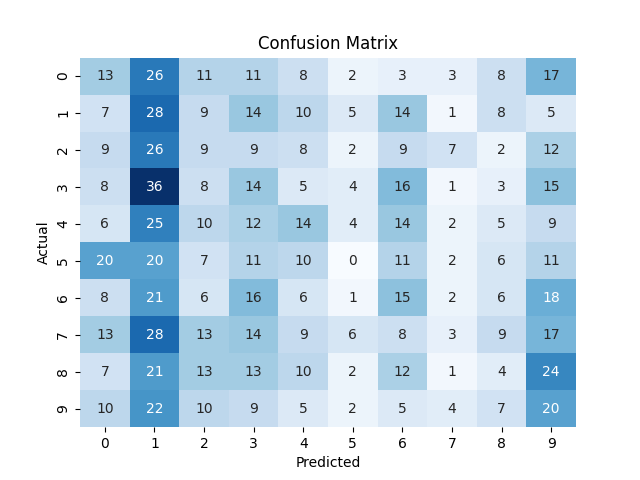

[[13 26 11 11  8  2  3  3  8 17]
 [ 7 28  9 14 10  5 14  1  8  5]
 [ 9 26  9  9  8  2  9  7  2 12]
 [ 8 36  8 14  5  4 16  1  3 15]
 [ 6 25 10 12 14  4 14  2  5  9]
 [20 20  7 11 10  0 11  2  6 11]
 [ 8 21  6 16  6  1 15  2  6 18]
 [13 28 13 14  9  6  8  3  9 17]
 [ 7 21 13 13 10  2 12  1  4 24]
 [10 22 10  9  5  2  5  4  7 20]]
              precision    recall  f1-score   support

           0       0.13      0.13      0.13       102
           1       0.11      0.28      0.16       101
           2       0.09      0.10      0.10        93
           3       0.11      0.13      0.12       110
           4       0.16      0.14      0.15       101
           5       0.00      0.00      0.00        98
           6       0.14      0.15      0.15        99
           7       0.12      0.03      0.04       120
           8       0.07      0.04      0.05       107
           9       0.14      0.21      0.17        94

    accuracy                           0.12      1025
   macro avg       

ValueError: ignored

In [50]:

if 'xgb_classification' in test_models_regression : 
    from xgboost import XGBClassifier
    linr = XGBClassifier()
    SS = StandardScaler()
    x_tr_st = SS.fit_transform(x_tr)
    x_te_st = SS.transform(x_te)
    
    print('\n\n')
    print( '\n\n xgb regreassion results ::\n')
    tune_param = {
        'max_depth': [4,5],
        'n_estimators' : [5],
        'learning_rate': [0.001, 0.01, 0.1],
        'tree_method' : ['gpu_hist'],

    }
    linr = GridSearchCV( XGBClassifier(), tune_param )
    linr.fit(x_tr_st, y_tr)
    #print('Best Parameters results :' , clf.cv_results_)
    print('best Parameteres: ' , linr.best_params_)
    
    #linr.fit(x_tr_st, y_tr)
    y_p_tr = linr.predict_proba(x_tr_st)
    y_p_te = linr.predict_proba(x_te_st)

    from sklearn.metrics import log_loss
    
    print('train :' ,log_loss(y_tr, y_p_tr))
    print('test :' ,log_loss( y_te , y_p_te))
    
    cm = confusion_matrix( y_te, y_p_te.argmax(axis =1 ) )
    plt.figure()
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print(cm)
    print(classification_report(y_te, y_p_te.argmax(axis =1 )  ))
    #print('r2_score_test :' ,r2_score(y_te, y_p_te) ,  '\n\n')
    test_models_regression['xgb_classification'] = (linr , 1,  mean_squared_error(y_te, y_p_te.argmax(axis =1 )))




#### Neural Network training here. 

Include 'nn_classification' in the test_regression_model to switch on. 

torch.Size([9223, 1024])


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch :: 0, loss_test :: 2.3019466400146484
epoch :: 10, loss_test :: 2.304561138153076
epoch :: 20, loss_test :: 2.3077197074890137
epoch :: 30, loss_test :: 2.3365187644958496
epoch :: 40, loss_test :: 2.3335070610046387
epoch :: 50, loss_test :: 2.3411898612976074
epoch :: 60, loss_test :: 2.3373663425445557
epoch :: 70, loss_test :: 2.3583855628967285
epoch :: 80, loss_test :: 2.3579626083374023
epoch :: 90, loss_test :: 2.3553011417388916
train : tensor(1.9187)
test : tensor(2.3488)


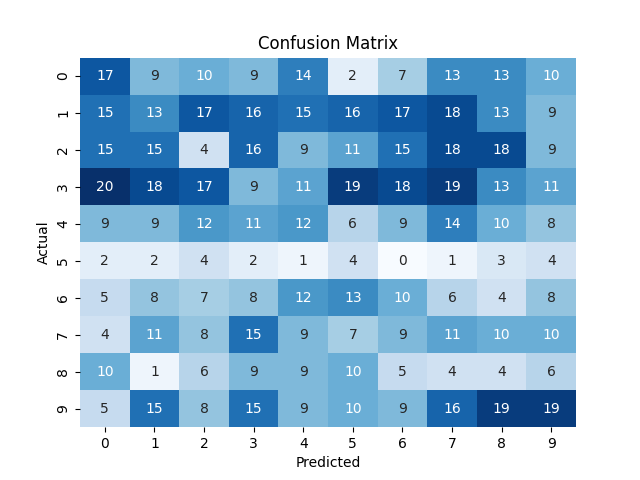

[[17  9 10  9 14  2  7 13 13 10]
 [15 13 17 16 15 16 17 18 13  9]
 [15 15  4 16  9 11 15 18 18  9]
 [20 18 17  9 11 19 18 19 13 11]
 [ 9  9 12 11 12  6  9 14 10  8]
 [ 2  2  4  2  1  4  0  1  3  4]
 [ 5  8  7  8 12 13 10  6  4  8]
 [ 4 11  8 15  9  7  9 11 10 10]
 [10  1  6  9  9 10  5  4  4  6]
 [ 5 15  8 15  9 10  9 16 19 19]]
              precision    recall  f1-score   support

           0       0.16      0.17      0.17       102
           1       0.09      0.13      0.10       101
           2       0.03      0.04      0.04        93
           3       0.06      0.08      0.07       110
           4       0.12      0.12      0.12       101
           5       0.17      0.04      0.07        98
           6       0.12      0.10      0.11        99
           7       0.12      0.09      0.10       120
           8       0.06      0.04      0.05       107
           9       0.15      0.20      0.17        94

    accuracy                           0.10      1025
   macro avg       

In [57]:
if 'nn_classification' in test_models_regression : 
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  x_tr_T = torch.tensor(x_tr , dtype=torch.float32)
  x_te_T = torch.tensor(x_te, dtype=torch.float32)
  y_tr_T = torch.tensor(y_tr).type(torch.LongTensor)
  y_te_T = torch.tensor(y_te).type(torch.LongTensor)
  print(x_tr_T.shape)
  model = nn.Sequential(
      nn.Linear(x_tr.shape[1], x_tr.shape[1]//2),
      nn.LeakyReLU(0.1), 
      nn.Linear(x_tr.shape[1]//2, x_tr.shape[1]//4),
      nn.LeakyReLU(0.1),
      nn.Linear(x_tr.shape[1]//4, 128), 
      nn.ReLU(), 
      nn.Linear(128, 128), 
      nn.ReLU(), 
      nn.Linear(128, 128), 
      nn.ReLU(), 
      nn.Linear(128, 64), 
      nn.ReLU(), 
      nn.Linear(64, out_features),
      nn.Softmax()
  )
  model = model.to(device)

  optim = torch.optim.Adam( model.parameters() , lr = 1e-4)
  loss_criterion = nn.CrossEntropyLoss()
  loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_tr_T, y_tr_T) , shuffle=True , batch_size = 128)

  no_epochs = 100
  N = x_tr_T.size(0)
  for epoch in range(no_epochs):
    model.train()
    for x_b, y_b in loader:
      x_b , y_b = x_b.to(device), y_b.to(device)
      y_pred = model(x_b)
      loss = loss_criterion(y_pred , y_b)
      optim.zero_grad()
      loss.backward()
      optim.step()
    
    if epoch % 10 != 0 : 
      continue
    # test on the test data.
    model.eval()
    model.to('cpu')
    y_p_te = model(x_te_T)
    print('epoch :: {}, loss_test :: {}'.format(epoch, loss_criterion(y_p_te, y_te_T)))
    model.to(device)

  model.eval()
  model.to('cpu')
  y_p_tr = model(x_tr_T).detach()
  y_p_te = model(x_te_T).detach()
  
  
  print('train :' ,loss_criterion(y_p_tr , y_tr_T))
  print('test :' ,loss_criterion(y_p_te,  y_te_T))
  
  cm = confusion_matrix(y_p_te.numpy().argmax(axis = 1) , y_te )
  plt.figure()
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  #print('model score : ', model.score(x_te, y_te))
  from sklearn.metrics import r2_score, confusion_matrix, f1_score
  print(cm)
  print(classification_report(y_te, y_p_te.numpy().argmax(axis = 1) ))
  #print('r2_score_test :' ,r2_score(y_te, y_p_te) ,  '\n\n')
  test_models_regression['xgb_classification'] = (model , 1,  loss_criterion(y_p_te,  y_te_T) )


#### CNN training here. 

Include 'cnn_classification' to switch on. 

In [ ]:
# this cell is to empty some cuda memory
import gc

gc.collect()
torch.cuda.empty_cache()

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


 Epoch :: 0 , test loss :: 2.3024492263793945 , train_loss :: 1
 Epoch :: 10 , test loss :: 2.31499981880188 , train_loss :: 1
 Epoch :: 20 , test loss :: 2.3367691040039062 , train_loss :: 1
 Epoch :: 30 , test loss :: 2.3380649089813232 , train_loss :: 1
 Epoch :: 40 , test loss :: 2.3372654914855957 , train_loss :: 1
 Epoch :: 50 , test loss :: 2.347113609313965 , train_loss :: 1
 Epoch :: 60 , test loss :: 2.3451499938964844 , train_loss :: 1
 Epoch :: 70 , test loss :: 2.344696044921875 , train_loss :: 1
 Epoch :: 80 , test loss :: 2.348515510559082 , train_loss :: 1
 Epoch :: 90 , test loss :: 2.3450417518615723 , train_loss :: 1
test : tensor(2.3424)


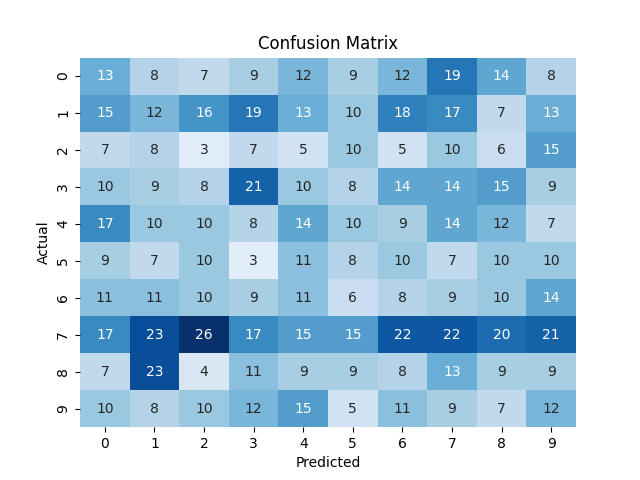

[[13  8  7  9 12  9 12 19 14  8]
 [15 12 16 19 13 10 18 17  7 13]
 [ 7  8  3  7  5 10  5 10  6 15]
 [10  9  8 21 10  8 14 14 15  9]
 [17 10 10  8 14 10  9 14 12  7]
 [ 9  7 10  3 11  8 10  7 10 10]
 [11 11 10  9 11  6  8  9 10 14]
 [17 23 26 17 15 15 22 22 20 21]
 [ 7 23  4 11  9  9  8 13  9  9]
 [10  8 10 12 15  5 11  9  7 12]]
              precision    recall  f1-score   support

           0       0.12      0.11      0.11       116
           1       0.09      0.10      0.09       119
           2       0.04      0.03      0.03       104
           3       0.18      0.18      0.18       116
           4       0.13      0.12      0.12       115
           5       0.09      0.09      0.09        90
           6       0.08      0.07      0.07       117
           7       0.11      0.16      0.13       134
           8       0.09      0.08      0.08       110
           9       0.12      0.10      0.11       118

    accuracy                           0.11      1139
   macro avg       

In [20]:

if 'cnn_classification' in test_models_regression: 
  # make gpu copies of the data. train test , labels etx. 
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  x_tr_T = torch.tensor(x_tr , dtype=torch.float32)
  x_te_T = torch.tensor(x_te, dtype=torch.float32)
  y_tr_T = torch.tensor(y_tr).type(torch.LongTensor)
  y_te_T = torch.tensor(y_te).type(torch.LongTensor)

  pass
  # transform the train nad the test imputs to look like an image of size N*2*512
  N = x_tr_T.size(0)
  x_tr_T  = torch.reshape(x_tr_T, (N, 1, 2, 512))
  N_t = x_te_T.size(0)
  x_te_T  = torch.reshape(x_te_T, (N_t, 1, 2, 512))
  # this will make them look like images and then convolutions can be performed on them 

  # declare a model that takes a 2 * 512 image as an input , and then add a few layer of cnn
  #convert to Fully connected layers and then return a softmax array of size (10,1), argmax is the solution. 
  model = nn.Sequential(
      nn.Conv2d(1, 128, (1,3) , 1 ),
      nn.LeakyReLU(0.1), 
      nn.Conv2d(128, 32, (1,3), 1),
      nn.LeakyReLU(0.1),
      nn.Conv2d(32, 2, (1,3), 1),
      nn.LeakyReLU(0.1),
      #nn.Conv2d(128, 128, 3, 1, 1),
      #nn.ReLU(),
      #nn.Conv2d(128, 128, 3, 1, 1),
      #nn.ReLU(),
      #nn.Conv2d(128, 4, (2,2), 2, 0),
      #nn.ReLU(),

      # what comes out here is a 2 * 512 array of inputs, I need to flatten it.
      nn.Flatten(),
      nn.Linear(2 * 2 * 506, 256), 
      nn.ReLU(),
      nn.Linear(256, 128), 
      nn.ReLU(),
      nn.Linear(128, 128),
      nn.ReLU(),
      nn.Linear(128, out_features),
      nn.Softmax()
  )

  # declare the optim, no_epochs, loss_criterion
  #run the training loop
  # in : declare the batch_size 
  # in : find the number of batches, make a rand index array that sample the inputs from the input arrays. 
  # in : run the batch loop 
  # in : in :  pass the batch throught the model
  # in : in : pass the otuput through loss criterin 
  # in : in : backward the loss 
  # in : in  : zero the grad and step the optimizer to update the weights 
  # loop over 

  optim = torch.optim.Adam( model.parameters() , lr = 1e-4)
  loss_criterion = nn.CrossEntropyLoss()
  loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_tr_T, y_tr_T) , shuffle=True , batch_size = 512)

  no_epochs = 100
  N = x_tr_T.size(0)
  for epoch in range(no_epochs):
    model.train()
    model.to(device)
    for x_b, y_b in loader:
      x_b , y_b = x_b.to(device), y_b.to(device)
      y_pred = model(x_b)
      loss = loss_criterion(y_pred , y_b)
      optim.zero_grad()
      loss.backward()
      optim.step()
    
    # test on the test data.
    if epoch%10 != 0 : 
        continue
    model.eval()
    model.to('cpu')
    #y_p_tr = model(x_tr_T)
    y_p_te = model(x_te_T)
    loss_train = 1 # loss_criterion(y_p_tr, y_tr_T).detach().item()
    print(' Epoch :: {} , test loss :: {} , train_loss :: {}'.format(epoch, loss_criterion(y_p_te, y_te_T).detach().item() ,loss_train ) )
    model.to(device)

  # now we have our trained model , we can use it to predict the brain signal
  # predict the brain signals on training and testing dataset
  model.eval()
  model.to('cpu')
  #y_p_tr = model(x_tr_T).detach()
  y_p_te = model(x_te_T).detach()
  
  #print('train :' ,loss_criterion(y_p_tr , y_tr_T))
  print('test :' ,loss_criterion(y_p_te,  y_te_T))
  
  cm = confusion_matrix(y_p_te.numpy().argmax(axis = 1) , y_te )
  plt.figure()
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  #print('model score : ', model.score(x_te, y_te))
  from sklearn.metrics import r2_score, confusion_matrix, f1_score
  print(cm)
  print(classification_report(y_te, y_p_te.numpy().argmax(axis = 1) ))
  #print('r2_score_test :' ,r2_score(y_te, y_p_te) ,  '\n\n')
  
  test_models_regression['xgb_classification'] = (model , 1,  loss_criterion(y_p_te,  y_te_T) )



<ipython-input-23-8a66b1510384>:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.linear2(x))


Epoch :: 0  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 10  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 20  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 30  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 40  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 50  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 60  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 70  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 80  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
Epoch :: 90  test_loss :: 2.3025851249694824 , train_loss :: 2.3025853633880615
test : tensor(2.3026)


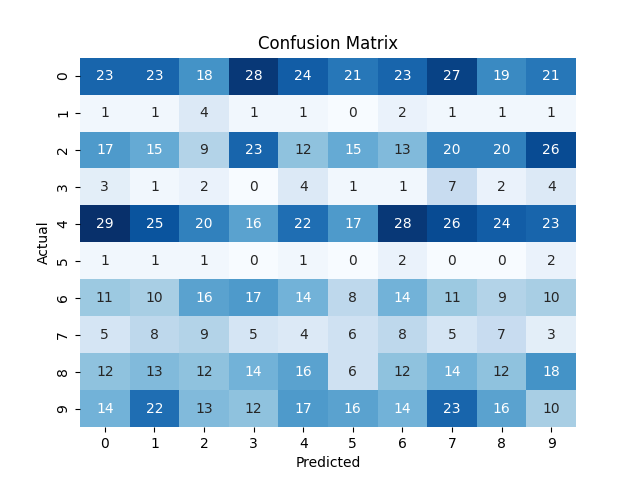

              precision    recall  f1-score   support

           0       0.10      0.20      0.13       116
           1       0.08      0.01      0.02       119
           2       0.05      0.09      0.07       104
           3       0.00      0.00      0.00       116
           4       0.10      0.19      0.13       115
           5       0.00      0.00      0.00        90
           6       0.12      0.12      0.12       117
           7       0.08      0.04      0.05       134
           8       0.09      0.11      0.10       110
           9       0.06      0.08      0.07       118

    accuracy                           0.08      1139
   macro avg       0.07      0.08      0.07      1139
weighted avg       0.07      0.08      0.07      1139



In [23]:


if 'lstm_classification' in test_models_regression:
  # what we have here - x_train , y_train, x_test, y_test. 
  device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
  x_tr_T = torch.tensor(x_tr , dtype=torch.float32)
  x_te_T = torch.tensor(x_te, dtype=torch.float32)
  y_tr_T = torch.tensor(y_tr).type(torch.LongTensor)
  y_te_T = torch.tensor(y_te).type(torch.LongTensor)
  batch_size = 512
  input_size = 2

  x_tr_t = torch.zeros((x_tr_T.size(0) , batch_size, input_size))
  for i in range(x_tr_T.size(0)): 
    x_tr_t[i] = x_tr_T[i].view(2, 512).t()
  
  x_te_t = torch.zeros((x_te_T.size(0) , batch_size, input_size))
  for i in range(x_te_T.size(0)): 
    x_te_t[i] = x_te_T[i].view(2, 512).t()
  
  y_tr_t = torch.zeros((x_tr_T.size(0) , batch_size, 1)).type(torch.LongTensor)
  for i in range(y_tr_T.size(0)): 
    y_tr_t[i] = y_tr_T[i] * torch.ones((batch_size, 1))

  y_te_t = torch.zeros((x_te_T.size(0) , batch_size, 1)).type(torch.LongTensor)
  for i in range(y_te_T.size(0)): 
    y_te_t[i] = y_te_T[i] * torch.ones((batch_size, 1))

  class EEGMnistClassifier(nn.Module):
    def __init__(self):
      super().__init__()
      self.lstm = nn.LSTM(input_size = 2, hidden_size = 32, num_layers = 4, batch_first = True)
      self.linear = nn.Linear(32, 16)
      self.relu = nn.ReLU()
      self.linear2 = nn.Linear(16, 10)
      self.softmax = nn.Softmax()
    
    def forward(self, x): 
      x, _ = self.lstm(x)
      x = self.relu(self.linear(x))
      x = self.softmax(self.linear2(x))
      return x
  

  loss_criterion = nn.CrossEntropyLoss()
  EEGModel = EEGMnistClassifier().to(device)
  opti = torch.optim.Adam(EEGModel.parameters(), lr = 1e-5)

  loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_tr_t, y_tr_t) , shuffle = True, batch_size = 512)
  
  n_epochs = 100
  for i in range(n_epochs): 
    EEGModel.train()
    for x_b , y_b in loader : 
      x_b , y_b = x_b.to(device), y_b.to(device)
      y_pred = EEGModel(x_b)
      loss = loss_criterion( y_pred.view(-1,10), y_b.view(-1) )
      opti.zero_grad()
      loss.backward()
      #if i%10 == 5 : print('train loss :: {}'.format(loss.detach().item()))
      opti.step()

    # validation 
    if i%10 != 0:
      continue
    
    EEGModel.eval()
    with torch.no_grad(): 
      EEGModel.to('cpu')
      y_p_tr = EEGModel(x_tr_t)
      y_pred = EEGModel(x_te_t)
      #ipdb.set_trace()
      loss_test = loss_criterion(y_pred[:, -1, :].view(-1,out_features), y_te_t[:, -1, :].view(-1))
      loss_train = loss_criterion(y_p_tr[:, -1, :].view(-1,out_features), y_tr_t[:, -1, :].view(-1))
      print('Epoch :: {}  test_loss :: {} , train_loss :: {}'.format(i, loss_test.detach().item() , loss_train.detach().item() ))
      EEGModel.to(device)
  
  EEGModel.eval()
  EEGModel.to('cpu')
  #y_p_tr = EEGModel(x_tr_t)[:, -1, :].view(-1,out_features).detach()
  y_p_te = EEGModel(x_te_t)[:, -1, :].view(-1,out_features).detach()
  
  # show the outputs as always. 
  #print('train :' ,loss_criterion(y_p_tr , y_tr_t[:, -1, :].view(-1)))
  print('test :' ,loss_criterion(y_p_te,  y_te_t[:, -1, :].view(-1)))

  #confusion matrix
  cm = confusion_matrix(y_p_te.to('cpu').numpy().argmax(axis = 1) , y_te )
  plt.figure()
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print(classification_report(y_te, y_p_te.to('cpu').numpy().argmax(axis = 1) ))
  #print('model score : ', model.score(x_te, y_te))
  from sklearn.metrics import r2_score, confusion_matrix, f1_score
  test_models_regression['lstm_classification'] = (EEGModel , 1, loss_criterion(y_p_te,  y_te_t[:, -1, :].view(-1))  )
    
  
